In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(32)

Simulation of a Homogeneous Poisson Process with Rate λ, on [0; T]

In [ ]:

lambda_int = 1
T = 100
t = 0
time_list = [t]
while t < T:
    u = np.random.uniform(0, 1)
    dt = -np.log(u) / lambda_int # so that w ∼ exponential(λ)
    t += dt
    time_list.append(t)
    
plt.plot(time_list), len(time_list)

(Lewis and Shedler, 1979, p.7, Algorithm 1) Simulation of an Inhomogeneous Poisson
Process with Bounded Intensity Function λ(t), on [0; T ]

In [ ]:
def intensity(t):
    return 1 + np.sin(t)

lambda_sup = 2

T = 2 * np.pi
x_axis = np.linspace(0, T, 500)
t = 0

n = 0
m = 0
s = 0

t_list = [t]
t_intensity_list = [intensity(t)]

s_list = [s]
s_intensity_list = [intensity(s)]

Dlam_list = [0]

while s < T:
    u = np.random.uniform(0, 1)
    w = - np.log(u) / lambda_sup
    s += w
    D = np.random.uniform(0, 1)
    Dlam_list.append(D * lambda_sup)
    if D < intensity(s)/lambda_sup:
        t = s
        t_list.append(t)
        t_intensity_list.append(intensity(t))
        n +=1
    s_list.append(s)
    s_intensity_list.append(intensity(s))
    m += 1
    
    

intensity_plot = [intensity(t) for t in x_axis]

if time_list[-1] <= T:
    print('First')
    plt.plot(x_axis, intensity_plot)
    plt.axhline(lambda_sup, color = 'r', linestyle = '-')
    # plt.scatter(t_list, t_intensity_list, marker='*')
    # plt.scatter(s_list, s_intensity_list, marker='o')
    plt.scatter(s_list, Dlam_list)
else:
    print('second')
    plt.plot(x_axis, intensity_plot)
    plt.axhline(lambda_sup, color = 'r', linestyle = '-')
    # plt.scatter(t_list, t_intensity_list, marker='*')
    # plt.scatter(s_list, s_intensity_list, marker='o')
    plt.scatter(s_list, Dlam_list)



In [ ]:
len(s_list), len(t_list), len(Dlam_list), s_list, t_list

In [ ]:
def h(t):
    return np.exp(-t/10)
    # return np.random.uniform(0,20)

def sigma(t):
    if t >= 0  and t <= 10:
        return 20
    else:
        return 0

def intensity(t, past):
    m = 2
    return sigma(t) + m * sum(h(i) for i in past)


T = 0.1
x_axis = np.linspace(0, T, 500)

ti_list = []
t_intensity_list = []


D_list = []
Dlam_list = []

intensity_max = []
inensity_conditional = [0] * len(x_axis)

intensity_plot = []

n = 0
s = 0
s_list = [s]

while s < T:
    
    lambda_bar = intensity(s, ti_list)
    intensity_max.append(lambda_bar)
    
    u = np.random.uniform(0, 1)
    w = - np.log(u) / lambda_bar
    s += w
    
    s_list.append(s)
    
    D = np.random.uniform(0, 1)
    
    D_list.append(D)
    Dlam_list.append(D * lambda_bar)
    
    lambda_prob = intensity(s, ti_list)
    
    if D < lambda_prob/lambda_bar:
        t = s
        ti_list.append(t)
        t_intensity_list.append(D * lambda_bar)
        n +=1


m = 2
ti_list_np = np.asarray(ti_list)
intensity_plot = [sigma(x) + np.sum(np.exp(- 0.1 * np.exp(x - ti_list_np[ti_list_np < x])))) for x in np.arange(0, 1, .001)]

# for x in np.arange(0, T, .001):

#     y = sigma(x) + np.sum(np.exp(- 0.1 * np.exp(x - ti_list_np[ti_list_np < x])))
#     intensity_plot.append(y)
    

# mu, alpha, beta = .1, .2, .1
# lda_ar = [mu + np.sum(alpha * beta * np.exp(-beta * (x - ti_list[ti_list < x]))) for x in np.arange(0, 100, .1)]

plt.plot(ti_list, np.ones_like(ti_list) * .001, 'k.')
_ = plt.plot(np.arange(0, T, .001), intensity_plot, 'b-')

# if ti_list[-1] <= T:
#     print('First')
#     plt.plot(ti_list, t_intensity_list)
# else:
#     print('second')
#     plt.plot(ti_list, t_intensity_list)

In [ ]:
ali = np.linspace(0,1, 10000)
mori = [np.sum(np.exp(- 0.1 * np.exp(x - ti_list_np[ti_list_np < x]))) for x in ali]
plt.plot(ali, mori)

In [ ]:
ti_list_np[ti_list_np < 0.3]

In [ ]:
ti_list

In [ ]:
import random
import matplotlib.pyplot as plt

def simulate_hawkes(intensity, decay, T):
  s = 0
  n = 0
  event_times = []
  while s < T:
    intensity_at_s = intensity + sum(decay * intensity * (s - t) for t in event_times)
    u = random.uniform(0, 1)
    w = -1 * np.log(u) / intensity_at_s
    s += w
    D = random.uniform(0, 1)
    if D * intensity_at_s < intensity:
      n += 1
      tn = s
      event_times.append(tn)
  if tn < T:
    return event_times
  else:
    return event_times[:-1]

# Set the parameters of the Hawkes process
intensity = 1.0
decay = 0.5
T = 10

# Simulate the Hawkes process
event_times = simulate_hawkes(intensity, decay, T)

# Plot the event times
plt.scatter(event_times, [0] * len(event_times))
plt.show()

mu, alpha, beta = .1, .2, .1
# uv = UnivariateExpHawkesProcess()
# uv.set_params(mu, alpha, beta)
smp = np.asarray(event_times)

# smp = np.asarray([0.011222841099724191,
#  0.01968597092052369,
#  0.02850985538279263,
#  0.03351525957335989,
#  0.10442196165471858])

range_list = np.arange(0, T, .001)
# range_list = np.arange(0, 100, .1)

lda_ar = [0.5 + np.sum(0.5 * 0.5 * np.exp(-0.5 * (x - smp[smp < x]))) \
          for x in range_list]

plt.figure(figsize=(15,2))
# plt.yscale("log")
plt.ylabel("$\lambda^*(t)$")
plt.xlabel("$t$")
# plt.plot(smp, np.ones_like(smp) * T, 'k.')
_ = plt.plot(range_list, lda_ar, 'b-')
plt.scatter(event_times, [0] * len(event_times))
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(32)

def sigma(t):
    if t >= 0  and t <= 10:
        return 20
    else:
        return 0

def simulate_hawkes_process(mu, alpha, beta, Ti):
    T_list = []  # initialize empty set of event times
    s = 0   # initialize current time
    n = 0   # initialize number of events
    
    while s < Ti:
        # compute current intensity
        lambda_s = sigma(s) + alpha*sum(np.exp(-beta*(s - t)) for t in T_list)
        # lambda_s = mu + alpha*sum(np.random.uniform(0,20) for t in T_list)
        
        # generate candidate event time
        u = np.random.uniform(0,1)
        # w = -np.log(u)/lambda_s  # w is exponentially distributed with rate lambda_s
        w = np.exp(-beta*(s))
        s += w
        
        # accept candidate event time with probability lambda(s)/lambda_s
        D = np.random.uniform()
        lambda_prob = sigma(s) + alpha*sum(np.exp(-beta*(s - t)) for t in T_list)
        # lambda_prob = mu + alpha*sum(np.random.uniform(0,20) for t in T_list)
        
        if D*lambda_s <= lambda_prob:
            n += 1  # update number of events
            T_list.append(s)  # add event time to set
    
    # return set of event times
    if T_list[-1] <= Ti:
        return T_list
    else:
        return T_list[:-1]
    
T = 10
event_times = simulate_hawkes_process(mu=1.0, alpha=0.6, beta=0.8, Ti=T)
# print(event_times)

# Plot the event times
plt.scatter(event_times, [0] * len(event_times))
plt.show()

smp = np.asarray(event_times)

range_list = np.arange(0, T, .001)

lda_ar = [0.5 + np.sum(0.5 * 0.5 * np.exp(-0.5 * (x - smp[smp < x]))) \
          for x in range_list]

# plt.figure(figsize=(15,30))
plt.figure(figsize=(15,2))
# plt.yscale("log")
plt.ylabel("$\lambda^*(t)$")
# plt.yscale('log')
# plt.ylim(10, 15)
plt.xlabel("$t$")
# plt.plot(smp, np.ones_like(smp) * T, 'k.')

plt.yticks(np.arange(0, 5, 0.1))
_ = plt.plot(range_list, lda_ar, 'b-')

KeyboardInterrupt: 

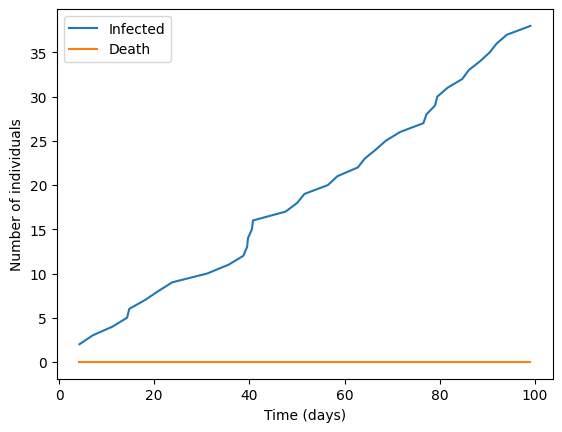

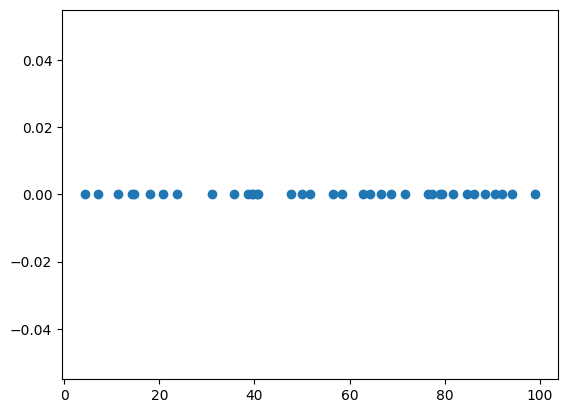

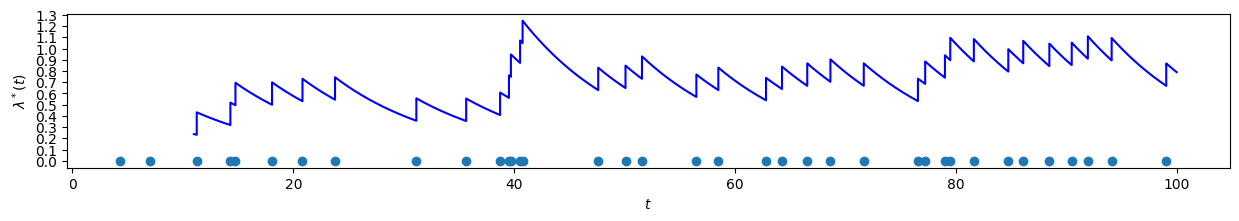

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(32)

def sigma(t):
    if t >= 0  and t <= 10:
        return 20
    else:
        return 0

def simulate_hawkes_process(mu, alpha, beta, Ti):
    T_list = []  # initialize empty set of event times
    s = 0   # initialize current time
    n = 0   # initialize number of events
    
    n_infected = 1
    
    infected_list = []
    death_list = []
    
    cum_h = []
    
    while s < Ti:
        # compute current intensity
        lambda_s = sigma(s) + alpha*sum(mu * np.exp(-beta*(s - t)) for t in T_list)
        # lambda_s = mu + alpha*sum(np.random.uniform(0,20) for t in T_list)
        
        # generate candidate event time
        # u = np.random.uniform(0,1)
        # w = -np.log(u)/lambda_s  # w is exponentially distributed with rate lambda_s
        # w = mu * np.exp(-beta*(s))
        w = np.random.uniform(0,5)
        s += w
        
        # accept candidate event time with probability lambda(s)/lambda_s
        D = np.random.uniform()
        lambda_prob = sigma(s) + alpha*sum(mu * np.exp(-beta*(s - t)) for t in T_list)
        # lambda_prob = mu + alpha*sum(np.random.uniform(0,20) for t in T_list)
        
        if D*lambda_s <= lambda_prob:
            # print(lambda_prob/lambda_s)
            n_infected += 1  # update number of events
            T_list.append(s)  # add event time to set
            
            n_death = int(0.02 * n_infected)
            # Update lists
            infected_list.append(n_infected - n_death)
            death_list.append(n_death)
            
            cum_h.append(lambda_prob)
            
    # return set of event times
    if T_list[-1] <= Ti:
        return T_list, infected_list, death_list, cum_h
    else:
        return T_list[:-1], infected_list[:-1], death_list[:-1], cum_h[:-1]
    
T = 100
event_times, infected_list, death_list, cum_h = simulate_hawkes_process(mu=0.1, alpha=2, beta=0.1, Ti=T)

# Plot the evolution over time of infected/death individuals
plt.figure()
plt.plot(event_times, infected_list, label='Infected')
plt.plot(event_times, death_list, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

# Plot the event times
plt.scatter(event_times, [0] * len(event_times))
plt.show()

smp = np.asarray(event_times)

range_list = np.arange(0, T, .001)

lda_ar = [ sigma(x) + 2 * np.sum(0.1 * np.exp(-0.1 * (x - smp[smp < x]))) for x in range_list]

# plt.figure(figsize=(15,30))
plt.figure(figsize=(15,2))
# plt.yscale("log")
plt.ylabel("$\lambda^*(t)$")
# plt.yscale('log')
# plt.ylim(10, 15)
plt.xlabel("$t$")
# plt.plot(smp, np.ones_like(smp) * T, 'k.')
# plt.yticks(np.arange(0, 20, 0.1))
plt.yticks(np.arange(0, 5, 0.1))
_ = plt.plot(range_list[11000:], lda_ar[11000:], 'b-')
plt.scatter(event_times, [0] * len(event_times))
plt.show()


# def h_uniform(t):
#     return np.random.uniform(0, 20)

# # for x in range_list:
# #     temp_list = [2 * h_uniform(x - t) for t in smp[smp < x]]
# #     # print(0.1 + np.sum(temp_list))
# #     lda_ar.append(sigma(x) + np.sum(temp_list))

# lda_ar = [sigma(x) + 2 * np.sum(h_uniform(x - smp[smp < x])) for x in event_times]


# ar_pp = sorted(np.random.rand(np.random.poisson(20)) * T)
# f = plt.figure(figsize=(15,2))

# plt.step(np.cumsum(cum_h), np.cumsum(np.ones_like(cum_h)))
# plt.ylabel("$N(t)$")
# plt.xlabel('$t$')
# # _ = plt.plot(cum_h, np.zeros_like(cum_h), 'k.')



0.5551287779985967 1.0
0.5965534361232749 0.9974005126109193
0.91090832966776 0.9945639777675207
0.23857612632391179 0.9995237340518455
0.596086098654914
0.3579784002842924 0.45938850383736984
0.596086098654914
0.596086098654914
0.38836719306499334 0.5155153077354306
0.596086098654914
0.46732003620239726 0.5357007233652151
0.596086098654914
0.596086098654914
0.39816275127851153 0.561103032108745
0.596086098654914
0.596086098654914
0.07279558814690046 0.5723583443490383
0.596086098654914
0.596086098654914
0.596086098654914
0.596086098654914
0.42856230198739953 0.43762000688313335
0.596086098654914
0.596086098654914
0.07744945195769037 0.38662334261149983
second


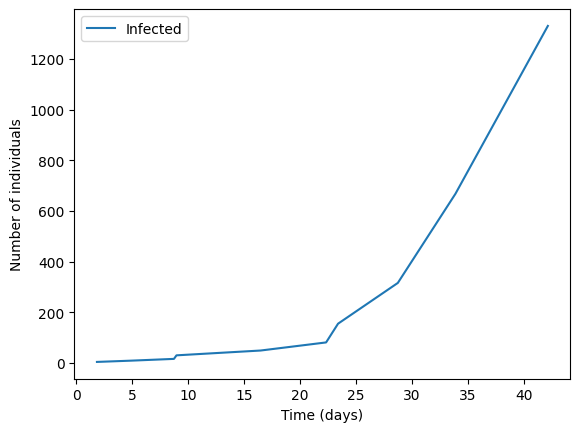

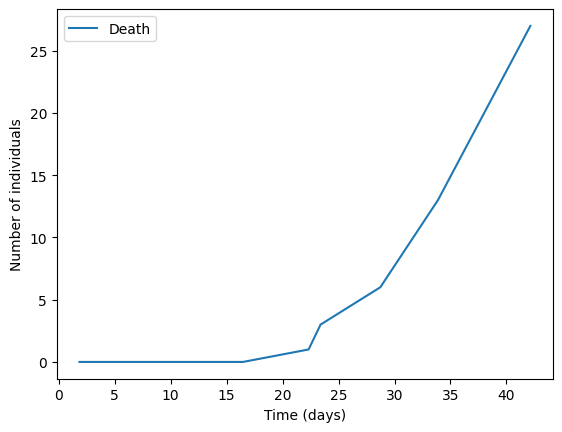

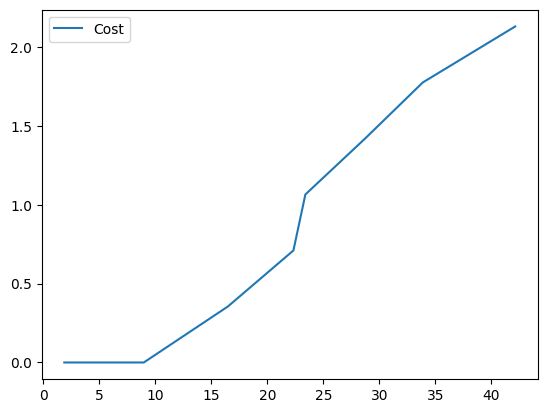

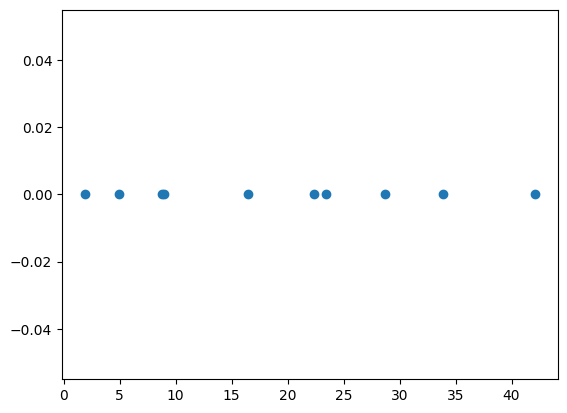

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
np.random.seed(32)

# Define the cost function
cost_func = lambda c: c**2  # Cost is proportional to rho^2

def sigma(t):
    if t >= 0  and t <= 10:
        return 20
    else:
        return 0

def simulate_hawkes_process(mu, alpha, beta, Ti):
    T_list = []  # initialize empty set of event times
    s = 0   # initialize current time
    n = 0   # initialize number of events
    
    t_start = 10
    target_death = 20000  # Average number of deaths over 1 year (20K)
    
    n_infected = 1
    last_children = 1
    
    infected_list = []
    death_list = []
    cost_list = []
    
    rho = 1
    flag = 1
    
    while s < Ti:
        # compute current intensity
        lambda_s = sigma(s) + alpha*sum(beta * np.exp(-beta*(s - t)) for t in T_list)
        # lambda_s = mu + alpha*sum(np.random.uniform(0,20) for t in T_list)
        
        if s >= t_start:
            
            '''
            Note that this code uses the scipy.optimize.minimize function to optimize the value of rho using the SLSQP algorithm, 
            which is a method for optimizing with bounds and constraints. 
            The average_deaths function is used as the objective function, 
            and a constraint is added to ensure that the average number of deaths does not exceed the death threshold. 
            The cost function is used to calculate the cost of the non-pharmaceutical interventions.
            '''
            rho = 1e5 * minimize_scalar(lambda rho: cost_func(rho) + (Ti-s)/Ti * (death_list[-1]/s - target_death/Ti)**2, bounds=(0, 1), method='bounded').x
            print(rho)
            # Update the intensity with the value of rho(t)
            # lambda_s *= rho
            flag = 0
        
        # generate candidate event time
        u = np.random.uniform(0,1)
        # w = -np.log(u)/lambda_s  # w is exponentially distributed with rate lambda_s
        # w = alpha * beta  * np.exp(-beta * (s))
        w = np.random.uniform(0, 5)
        
        s += w
        
        # accept candidate event time with probability lambda(s)/lambda_s
        D = np.random.uniform()
       
        lambda_prob = rho * (sigma(s) + alpha*sum(beta * np.exp(-beta*(s - t)) for t in T_list))
        # lambda_prob = mu + alpha*sum(np.random.uniform(0,20) for t in T_list)
        
        
        if D <=(lambda_prob / lambda_s):
            print(D, lambda_prob / lambda_s)
            temp = 0 
            for i in range(last_children):
                temp += np.random.poisson(2)
            
            last_children = temp
                
            n_infected += last_children  # update number of events
            T_list.append(s)  # add event time to set
            
            n_death = int(0.02 * n_infected)
            # Update lists
            infected_list.append(n_infected - n_death)
            death_list.append(n_death)
            
            if flag:
                cost_list.append(0)
            else:
                cost_list.append(cost_list[-1] + cost_func(rho))
                
        
    # return set of event times
    if T_list[-1] <= Ti:
        print('first')
        return T_list, infected_list, death_list, cost_list
    else:
        print('second')
        return T_list[:-1], infected_list[:-1], death_list[:-1], cost_list[:-1]
    
T = 50
event_times, infected_list, death_list, cost_list = simulate_hawkes_process(mu=1.0, alpha=2, beta=0.1, Ti=T)

# Plot the evolution over time of infected/death individuals
plt.figure()
plt.plot(event_times, infected_list, label='Infected')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

plt.figure()
plt.plot(event_times, death_list, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

plt.figure()
plt.plot(event_times, cost_list, label='Cost')
plt.legend()
plt.show()

# Plot the event times
plt.scatter(event_times, [0] * len(event_times))
plt.show()

smp = np.asarray(event_times)

range_list = np.arange(0, T, .001)

# def h_expo(t):
#     return np.exp(-0.1 * t)

# def h_uniform(t):
#     return np.random.uniform(0, 20)

# lda_ar = [1 + np.sum(h_expo(x - smp[smp < x])) for x in range_list]
# # lda_ar = [1 + np.sum(np.exp(-0.1 * (x - smp[smp < x]))) for x in range_list]

# # lda_ar = [1 + np.sum(h_uniform(x - smp[smp < x])) for x in range_list]
# # lda_ar = [1 + np.sum(np.random.uniform(0, 20)) for x in range_list]



# # plt.figure(figsize=(15,30))
# plt.figure(figsize=(15,2))
# # plt.yscale("log")
# plt.ylabel("$\lambda^*(t)$")
# # plt.yscale('log')
# # plt.ylim(10, 15)
# plt.xlabel("$t$")
# # plt.plot(smp, np.ones_like(smp) * T, 'k.')

# # plt.yticks(np.arange(0, T, 0.01))
# _ = plt.plot(range_list, lda_ar, 'b-')

In [38]:
np.random.uniform()

0.8676298542597108

In [ ]:
# plt.figure(figsize=(15,30))
plt.figure(figsize=(15,2))
# plt.yscale("log")
plt.ylabel("$\lambda^*(t)$")
# plt.yscale('log')
# plt.ylim(10, 15)
plt.xlabel("$t$")
# plt.plot(smp, np.ones_like(smp) * T, 'k.')

# plt.yticks(np.arange(0, T, 0.01))
_ = plt.plot(range_list[:100], lda_ar[:100], 'b-')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
np.random.seed(32)

# Define the cost function
cost_func = lambda c: c**2  # Cost is proportional to rho^2

def sigma(t):
    if t >= 0  and t <= 10:
        return 20
    else:
        return 0
def simulate_hawkes_process(mu, alpha, beta, rho, Ti):
    T_list = [0]  # initialize empty set of event times
    s = 0   # initialize current time
    n = 0   # initialize number of events
    
    n_infected = 1
    n_death = 0
    
    infected_list = [0]
    death_list = [0]
    
    cost_list = [0]
    
    while s < Ti:
        # compute current intensity
        lambda_s = rho(s) * (sigma(s) + alpha*sum(np.exp(-beta*(s - t)) for t in T_list))
        # lambda_s = rho(s) * (mu + alpha*sum(np.random.uniform(0,20) for t in T_list))
        
        # generate candidate event time
        u = np.random.uniform(0,1)
        # w = -np.log(u)/lambda_s  # w is exponentially distributed with rate lambda_s
        w = np.exp(-beta*(s))
        s += w
        
        # accept candidate event time with probability lambda(s)/lambda_s
        D = np.random.uniform()
        lambda_prob = rho(s) * (sigma(s) + alpha*sum(np.exp(-beta*(s - t)) for t in T_list))
        # lambda_prob = rho(s) * (mu + alpha*sum(np.random.uniform(0,20) for t in T_list))
        
        if D*lambda_s <= lambda_prob:
            n += 1  # update number of events
            
            
            n_infected += 1
            n_death += int(0.02 * n_infected)
            
            # Update lists
            infected_list.append(n_infected - n_death)
            death_list.append(n_death)
            cost_list.append(np.square(rho(s)) * cost_list[-1])
            # cost_list.append(np.square(rho(s)) * (s - T_list[-1])[0])
            T_list.append(s)  # add event time to set
        
    # return set of event times
    if T_list[-1] <= Ti:
        return T_list, infected_list, death_list, cost_list
    else:
        return T_list[:-1], infected_list[:-1], death_list[:-1], cost_list[:-1]


def rho(t):
    if t < 0.2:
        return 1
    else:
        return np.exp(-0.1*(t-0.2))

from scipy.optimize import minimize

def cost_function(beta):
    # Simulate Hawkes process with given beta
    event_times, infected_list, death_list, cost_list = simulate_hawkes_process(mu=1.0, alpha=2, beta=beta, rho=rho, Ti=1)
    
    # Compute total cost and average number of deaths
    total_cost = np.sum(cost_list)
    avg_deaths = np.mean(death_list)
    
    # Return cost and violation of constraint
    # return total_cost, avg_deaths - 20000
    # return np.square(total_cost) + np.square(avg_deaths - 20000)
    return np.abs(total_cost) + np.abs(avg_deaths - 20000)

# Minimize cost function using Nelder-Mead algorithm
result = minimize(cost_function, x0=0.1, method='Nelder-Mead', options={'disp': True})
print(result)

# Simulate Hawkes process with optimal beta
event_times, infected_list, death_list, cost_list = simulate_hawkes_process(mu=1.0, alpha=2, beta=result.x[0], rho=rho, Ti=1)

# Plot the evolution over time of infected/death individuals
plt.plot(event_times, infected_list, label='Infected')
plt.plot(event_times, death_list, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

# Plot the obtained cost over 1 year
plt.plot(event_times, cost_list)
plt.xlabel('Time (days)')
plt.ylabel('Cost')
plt.show()



In [ ]:
rho_list = []
def simulate_hawkes_process(mu, alpha, beta, rho, Ti):
    T_list = [0]  # initialize empty set of event times
    s = 0   # initialize current time
    n = 0   # initialize number of events
    
    n_infected = 1
    n_death = 0
    
    infected_list = [0]
    death_list = [0]
    
    cost_list = [0]
    
    while s < Ti:
        # compute current intensity
        lambda_s = rho(s) * (sigma(s) + alpha*sum(np.exp(-beta*(s - t)) for t in T_list))
        # lambda_s = rho(s) * (mu + alpha*sum(np.random.uniform(0,20) for t in T_list))
        
        # generate candidate event time
        u = np.random.uniform(0,1)
        w = -np.log(u)/lambda_s  # w is exponentially distributed with rate lambda_s
        s += w
        
        # accept candidate event time with probability lambda(s)/lambda_s
        D = np.random.uniform()
        lambda_prob = rho(s) * (sigma(s) + alpha*sum(np.exp(-beta*(s - t)) for t in T_list))
        # lambda_prob = rho(s) * (mu + alpha*sum(np.random.uniform(0,20) for t in T_list))
        
        if D*lambda_s <= lambda_prob:
            n += 1  # update number of events
            
            
            n_infected += 1
            n_death += int(0.02 * n_infected)
            
            # Update lists
            infected_list.append(n_infected - n_death)
            death_list.append(n_death)
            cost_list.append(np.square(rho(s)))
            # cost_list.append(np.square(rho(s)) * (s - T_list[-1])[0])
            T_list.append(s)  # add event time to set
        
    # return set of event times
    if T_list[-1] <= Ti:
        return T_list, infected_list, death_list, cost_list
    else:
        return T_list[:-1], infected_list[:-1], death_list[:-1], cost_list[:-1]


def rho(t):
    if t < 0.2:
        return 1
    else:
        return np.exp(-0.1*(t-0.2))

from scipy.optimize import minimize

def cost_function(beta):
    # Simulate Hawkes process with given beta
    event_times, infected_list, death_list, cost_list = simulate_hawkes_process(mu=1.0, alpha=2, beta=beta, rho=rho, Ti=1)
    
    # Compute total cost and average number of deaths
    total_cost = np.sum(cost_list)
    avg_deaths = np.mean(death_list)
    
    # Return cost and violation of constraint
    # return total_cost, avg_deaths - 20000
    # return np.square(total_cost) + np.square(avg_deaths - 20000)
    return np.abs(total_cost) + np.abs(avg_deaths - 20000)

# Minimize cost function using Nelder-Mead algorithm
result = minimize(cost_function, x0=0.1, method='Nelder-Mead', options={'disp': True})
print(result)

# Simulate Hawkes process with optimal beta
event_times, infected_list, death_list, cost_list = simulate_hawkes_process(mu=1.0, alpha=2, beta=result.x[0], rho=rho, Ti=1)

# Plot the evolution over time of infected/death individuals
plt.plot(event_times, infected_list, label='Infected')
plt.plot(event_times, death_list, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

# Plot the obtained cost over 1 year
plt.plot(event_times, cost_list)
plt.xlabel('Time (days)')
plt.ylabel('Cost')
plt.show()



In [ ]:
np.exp(-0.08)

In [ ]:
from math import log, exp
import random
import matplotlib.pyplot as plt

def sigma(t):
    if t >= 0 and t <= 100:
      return 20
    else:
      return 0

def h(t):
    lambda_exp = 1/10
    return lambda_exp * exp(-1 * (lambda_exp * t))



def simulate_hawkes(intensity, decay, T):
  s = 0
  n = 0
  event_times = []
  while s < T:
    intensity_at_s = sigma(s) + sum(decay * h(s - t) for t in event_times)
    u = random.uniform(0, 1)
    w = -1 * (log(u) / intensity_at_s)
    s += w
    D = random.uniform(0, 1)

    intensity_prob = sigma(s) + sum(decay * h(s - t) for t in event_times)

    if D * intensity_at_s < intensity_prob:
      n += 1
      tn = s
      event_times.append(tn)
  if tn < T:
    return event_times
  else:
    return event_times[:-1]

# Set the parameters of the Hawkes process
intensity = 0.5
decay = 2
T = 1

# Simulate the Hawkes process
event_times = simulate_hawkes(intensity, decay, T)

# Plot the event times
plt.scatter(event_times, [0] * len(event_times))
plt.show()


import numpy as np
import matplotlib.pyplot as plt

smp = np.asarray(event_times)


range_list = np.arange(0, 1, .01)



lda_ar = []

for x in range_list:
    temp_list = [h(x - t) for t in smp[smp < x]]
    # print(0.1 + np.sum(temp_list))
    lda_ar.append(sigma(x) + 2 * np.sum(temp_list))

plt.figure(figsize=(30,30))
# plt.yscale("log")
plt.ylabel("$\lambda^*(t)$")
plt.xlabel("$t$")
# plt.yticks(np.arange(0, 3, 0.1))
plt.plot(smp, np.ones_like(smp) * 19, 'k.')
_ = plt.plot(range_list, lda_ar, 'b-')